In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# import metrics MRL
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

In [38]:
#CARGA DEL DATASET EN UN DATAFRAME DE PANDAS
data = pd.read_excel("Tabla_GDP_1parcial.xlsx")
df = pd.DataFrame(data)
df

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.383240,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.714140,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,NaN,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.517580,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108,0.000016,0.004498
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,NaN,NaN,3.1,1235994,0.000006,0.004679
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,16.2,530162,0.000004,0.003440
8,Jujuy,NaN,2.151390,13.367965,12.483179,0.721295,54.1615,3.7,673307,0.000003,0.003958
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951,0.000019,0.005415


In [39]:
#ANALIZAMOS VALORES NULOS
df.isnull().sum()

province                  0
gdp                       2
illiteracy                2
poverty                   0
deficient_infra           0
school_dropout            2
no_healthcare             2
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [40]:
#ANALIZAMOS QUE MEDIDA DE TENDENCIA CENTRAL VAMOS A USAR PARA IMPUTAR LOS VALORES NULOS
school_media = df["school_dropout"].mean()
school_mediana = df["school_dropout"].median()
print(f"La media es: {round(school_media, 2)} y la mediana: {round(school_mediana, 2)}")

La media es: 1.75 y la mediana: 1.44


In [41]:
illiteracy_media = df["illiteracy"].mean()
illiteracy_mediana = df["illiteracy"].median()
print(f"La media es: {round(illiteracy_media, 2)} y la mediana: {round(illiteracy_mediana, 2)}")

La media es: 3.17 y la mediana: 2.74


In [42]:
#DEBIDO A UN SESGO HACIA LA DERECHA O SESGO POSITIVO DE LA MEDIA, HACE QUE SE ALEJE DE LA MEDIANA
#EN ESTE CASO ES RECOMENDABLE IMPUTAR POR LA MEDIANAschool_mediana = df["school_dropout"].median()
illiteracy_mediana = df["illiteracy"].median()

df["school_dropout"].fillna(school_mediana, inplace= True)
df["illiteracy"].fillna(illiteracy_mediana, inplace= True)

C:\Users\kemer\AppData\Local\Temp\ipykernel_7144\769092331.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["school_dropout"].fillna(school_mediana, inplace= True)
C:\Users\kemer\AppData\Local\Temp\ipykernel_7144\769092331.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [43]:
#SELECCIÓN DE NUESTRAS VARIABLES DEPENDIENTES Y NUESTRA VARIABLE OBJETIVO
X = df[['illiteracy', 'doctors_per_cap']].values 
y = df['school_dropout'].values                  

print(f"Dimensiones de X (variables independientes): {X.shape}")
print(f"Dimensiones de y (variable dependiente): {y.shape}")

Dimensiones de X (variables independientes): (22, 2)
Dimensiones de y (variable dependiente): (22,)


In [44]:
#PARTICIÓN DEL DATASET EN DATOS DE ENTRENAMIENTO Y DATOS DE TESTING, RELACION %80 - %20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)
#ARRAY DE NUMPY QUE REPRESENTA LOS DATOS DE TESTING DE ANALFABETISMO Y DOCTORES PER CAPITA
X_test

array([[1.97594   , 0.0066717 ],
       [2.96326   , 0.00504365],
       [2.743675  , 0.00449529],
       [1.94375   , 0.00506652],
       [0.791485  , 0.00427063]])

In [45]:
#GRADO DEL POLINOMIO
degree = 4

#INICIAMOS EL TRANSFORMADOR QUE DARA LAS CARACTERÍSTICAS POLINÓMICAS
transformer = PolynomialFeatures(degree = degree, include_bias = False)

#DATOS DE ENTRENAMIENTO
X_train_poly = transformer.fit_transform(X_train)

print(f"Dimensiones de X_train original: {X_train.shape}")
print(f"Dimensiones de X_train_poly (después de la transformación polinómica): {X_train_poly.shape}")

Dimensiones de X_train original: (17, 2)
Dimensiones de X_train_poly (después de la transformación polinómica): (17, 14)


In [46]:
#CREAMOS EL MODELO DE REGRESIÓN LINEAL
model = LinearRegression()

#ENTRENAMOS EL MODELO CON LOS DATOS TRANSFORMADOS Y LAS VARIABLES OBJETIVO PARA ENTRENAR
model.fit(X_train_poly,y_train)

#TRANSFORMANDO LOS DATOS DE PRUEBA
X_test_poly = transformer.transform(X_test)

print(f"Dimensiones de X_test original: {X_test.shape}")
print(f"Dimensiones de X_test_poly (después de la transformación polinómica): {X_test_poly.shape}")

Dimensiones de X_test original: (5, 2)
Dimensiones de X_test_poly (después de la transformación polinómica): (5, 14)


In [47]:
#INGRESAMOS LOS DATOS DE TESTING, PARA HACER PREDICCIONES
pred_poli = model.predict(X_test_poly) 
pred_poli

array([-7.98244269,  2.56080033,  0.91886128,  1.18760864, -0.03743736])

In [48]:
#GENERAMOS LA MALLA DE PUNTOS PARA LA SUPERFICIE DE REGRESION
illiteracy_min, illiteracy_max = X[:, 0].min(), X[:, 0].max()
doctors_min, doctors_max = X[:, 1].min(), X[:, 1].max()

illiteracy_surf = np.linspace(illiteracy_min, illiteracy_max, 50) 
doctors_surf = np.linspace(doctors_min, doctors_max, 50)     

illiteracy_surf, doctors_surf = np.meshgrid(illiteracy_surf, doctors_surf)

X_surf_raw = np.hstack((illiteracy_surf.reshape(-1, 1), doctors_surf.reshape(-1, 1)))

X_surf_poly = transformer.transform(X_surf_raw)

#PREDICCION DE LOS VALORES
y_surf = model.predict(X_surf_poly) 

y_surf = y_surf.reshape(illiteracy_surf.shape)

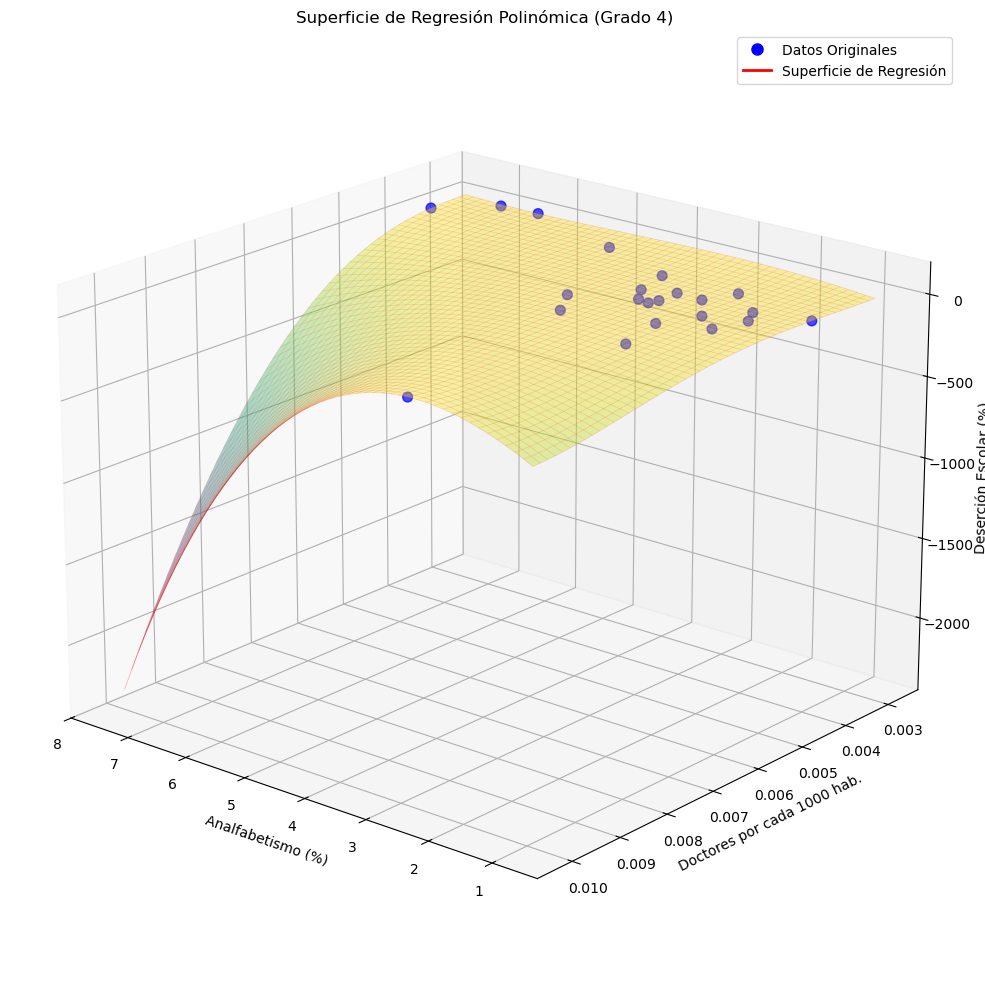

In [49]:
#GRAFICO 3D PARA VER LA SUPERFICIE DE REGRESION
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

#GRAFICANDO LOS PUNTOS DE LOS DATOS ORIGINALES
#X[:, 0] ES LA COLUMNA 'illiteracy'
#X[:, 1] ES LA COLUMNA 'doctors_per_cap'
#Y ES LA COLUMNA 'school_dropout'
ax.scatter(X[:, 0], X[:, 1], y, label='Datos Originales (Provincias)', color='blue', alpha=0.7, s=50)

#GRAFICAMOS LA SUPERFICIE DE REGRESIÓN EN SI MISMA
ax.plot_surface(illiteracy_surf, doctors_surf, y_surf,
                cmap='viridis',    
                alpha=0.4,         
                edgecolor='none') 

#GRAFICAMOS EL WAREFRAME PARA VER LA ESTRUCTURA DEL GRÁFICO DE MANERA MÁS CLARA
ax.plot_wireframe(illiteracy_surf, doctors_surf, y_surf,
                   color='red',    #
                   alpha=0.15,    
                   linewidth=0.5) 


ax.set_xlabel('Analfabetismo (%)')
ax.set_ylabel('Doctores por cada 1000 hab.')
ax.set_zlabel('Deserción Escolar (%)')
ax.set_title(f'Superficie de Regresión Polinómica (Grado {degree})')

scatter_proxy = plt.Line2D([0], [0], linestyle='none', c='blue', marker='o', markersize=8)
surface_proxy = plt.Line2D([0], [0], linestyle='-', c='red', linewidth=2) 
ax.legend([scatter_proxy, surface_proxy], ['Datos Originales', 'Superficie de Regresión'], numpoints=1)

ax.view_init(elev=20, azim=130)

plt.tight_layout()
plt.show()

In [50]:
#COEFICIENTES DEL POLINOMIO DE GRADO 4:
model.coef_

array([ 3.75019286e+02, -9.40506681e+04, -7.07464762e+01, -1.59716122e+05,
        5.68140216e+07,  2.81628820e+00,  2.69477620e+04,  1.79217206e+07,
       -8.88363872e+09,  4.79950683e-02, -8.64973007e+02, -2.20150732e+06,
       -3.39899424e+08,  3.85130491e+11])

In [51]:
#NUESTRO VALOR INDEPENDIENTE O INTERCEPCIÓN
a0 = model.intercept_

In [52]:
#ECUACIÓN POLINÓMICA DE GRADO 

#COEFICIENTES

b0 = a0 #REEMPLAZAMOS EL VALOR INDEPENDIENTE a0 EN b0
b1_illiteracy = round(model.coef_[0], 2)
b2_doctors = round(model.coef_[1], 2)
b3_illiteracy_sq = round(model.coef_[2], 2)
b4_doctors_sq = round(model.coef_[3], 2)
b5_interaction = round(model.coef_[4], 2)
b6_illiteracy_cube = round(model.coef_[5], 2)
b7_doctors_cube = round(model.coef_[6], 2)
b8_illiteracy_sq_doctors = round(model.coef_[7], 2)
b9_illiteracy_doctors_sq = round(model.coef_[8], 2)
b10_illiteracy_4 = round(model.coef_[9], 2)
b11_doctors_4 = round(model.coef_[10], 2)
b12_illiteracy_cube_doctors = round(model.coef_[11], 2)
b13_illiteracy_sq_doctors_sq = round(model.coef_[12], 2)
b14_illitercy_doctors_cube = round(model.coef_[13], 2)

print("TENEMOS NUESTRA ECUACIÓN POLINÓMICA:")
print(f"FÓRMULA DEL POLINOMIO DE GRADO {degree} (con 2 variables independientes):")
print(f"SCHOOL_DROPOUT (Y), ILLITERACY (X), DOCTORS_PER_CAP (X₂)")
print(f"La fórmula entonces es: Y = {b14_illitercy_doctors_cube} * X.X₂^3 + {b13_illiteracy_sq_doctors_sq} * X^2.X₂^2 \
{b12_illiteracy_cube_doctors} * X^3.X₂ + {b11_doctors_4} * X₂^4 + {b10_illiteracy_4} * X^4 \
{b9_illiteracy_doctors_sq} * X.X₂^2 + {b8_illiteracy_sq_doctors} * X^2.X₂ + \
{b7_doctors_cube} * X₂^3 + {b6_illiteracy_cube} * X^3 + {b5_interaction} * X.X₂ + {b4_doctors_sq} * X₂^2 + \
{b3_illiteracy_sq} * X^2 + {b2_doctors} * X₂ + {b1_illiteracy} * X + {b0}")

TENEMOS NUESTRA ECUACIÓN POLINÓMICA:
FÓRMULA DEL POLINOMIO DE GRADO 4 (con 2 variables independientes):
SCHOOL_DROPOUT (Y), ILLITERACY (X), DOCTORS_PER_CAP (X₂)
La fórmula entonces es: Y = 385130490866.65 * X.X₂^3 + -339899423.82 * X^2.X₂^2 -2201507.32 * X^3.X₂ + -864.97 * X₂^4 + 0.05 * X^4 -8883638718.23 * X.X₂^2 + 17921720.64 * X^2.X₂ + 26947.76 * X₂^3 + 2.82 * X^3 + 56814021.59 * X.X₂ + -159716.12 * X₂^2 + -70.75 * X^2 + -94050.67 * X₂ + 375.02 * X + -67.65942927697506


In [53]:
import pandas as pd
#COMPRACIÓN ENTRE DATOS REALES Y DATOS PREDICHOS
comparison_df = pd.DataFrame({'Real (y_test)': y_test,'Predicho (pred_poli)': pred_poli})
comparison_df

,Real (y_test),Predicho (pred_poli)
0,2.872181,-7.982443
1,3.298413,2.560800
2,3.864265,0.918861
3,1.393504,1.187609
4,0.289262,-0.037437


In [54]:
#EVALUAMOS LAS MÉTRICAS DEL MODELO DESPUÉS DE HABER ESCALADO LOS DATOS
print("\n--- Evaluación del Modelo en el Conjunto de Prueba ---")
#R²
r2_test = r2_score(y_test, pred_poli)
print(f"R-cuadrado (R²) en Prueba: {round(r2_test, 2)}")

#RSS
rss = mean_squared_error(y_test, pred_poli)*len(pred_poli)
print(f"La suma de los residuos al cuadrado (RSS) es: {round(rss, 2)}")
#MSE
mse_test = mean_squared_error(y_test, pred_poli)
print(f"Error Cuadrático Medio (MSE) en Prueba: {round(mse_test, 2)}")

#RMSE
rmse_test = np.sqrt(mse_test)
print(f"Raíz del Error Cuadrático Medio (RMSE) en Prueba: {round(rmse_test, 2)}")

#ERROR ABSOLUTO MÁXIMO
m = max_error(y_test, pred_poli)
print(f"El error absoluto máximo es: {round(m, 2)}")

#MAE
mae_test = mean_absolute_error(y_test, pred_poli)
print(f"Error Absoluto Medio (MAE) en Prueba: {round(mae_test, 2)}")


--- Evaluación del Modelo en el Conjunto de Prueba ---
R-cuadrado (R²) en Prueba: -13.74
La suma de los residuos al cuadrado (RSS) es: 127.19
Error Cuadrático Medio (MSE) en Prueba: 25.44
Raíz del Error Cuadrático Medio (RMSE) en Prueba: 5.04
El error absoluto máximo es: 10.85
Error Absoluto Medio (MAE) en Prueba: 3.01
